#_Análisis de datos en python_ 🐍
###Predicciones de ataques al corazon
---
**Torres Enriquez Paul Isaac** | Ingeniería en Sistemas Computacionales 💻 | Especialidad en Ciencia de datos

---


##_Descripción de datos_
* Age: Edad de los pacientes
* Sex: Sexo del paciente definido por '1' para hombre y '0' para mujeres
* cp (Chest Pain):
  >>**Value 1:** angina típica | **Value 2:** angína atípica | **Value 3:** dolor no anginoso | **Value 4:** asintomático
* trtbps: presión sanguínea en reposo
* chol: Colesterol in mg/dl buscado vía Sensor BMI
* fbs: glucemia en ayunas < 120 mg/dl
  >>**verdadero** = 1 | **falso** = 0
* rest_ecg: resultados electrocardiográficos en reposo
  >> **Value 0:** normal | **Value 1:** presenta anomalías de la onda ST-T | **Value 2:** Hipertrofia ventricular izquierda probable
* thalach: frecuencia cardiaca máxima alcanzada
* exang: angina inducida por el ejercicio
  >> **yes** = 1 | **no** = 0
* oldpeak: pico anterior
* slp: pendiente
* caa: número de buques principales (0-3)
* thall: tasa alta
* outpot: salida
  >> **menos oportunidad de ataque al corazon** = 0 | **mayor oportunidad de ataque al corazon** = 1

---
###Librerias de Código

In [ ]:
import pickle
import warnings
import numpy as np #algebra linear
import pandas as pd #manipulación y análisis de datos
import seaborn as sns #Satistical Visualization
import matplotlib.pyplot as plt #Visualización de datos

warnings.filterwarnings('ignore')

###Carga del Dataset

In [ ]:
#cargamos el dataset en una variable
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


###Análisis de Datos

In [ ]:
#primeras 5 observaciones
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#ultimas 5 observaciones
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#cambio de nombre a columnas
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df.columns = new_columns
df.tail()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#forma dada del dataset (Rows, Columns)
df.shape

(303, 14)

In [ ]:
#visualizamos la forma de tipo de objetos de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###Primera salida
* Como primeras observaciones encontramos que no hay valores nulos
* La mayoria de tipo de datos son **enteros** y uno con entrada **real**

#EDA (Exploratory Data Analysis)

In [ ]:
#verificamos cada valor nulo
df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#realizamos la suma de valores nulos en cada variable
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

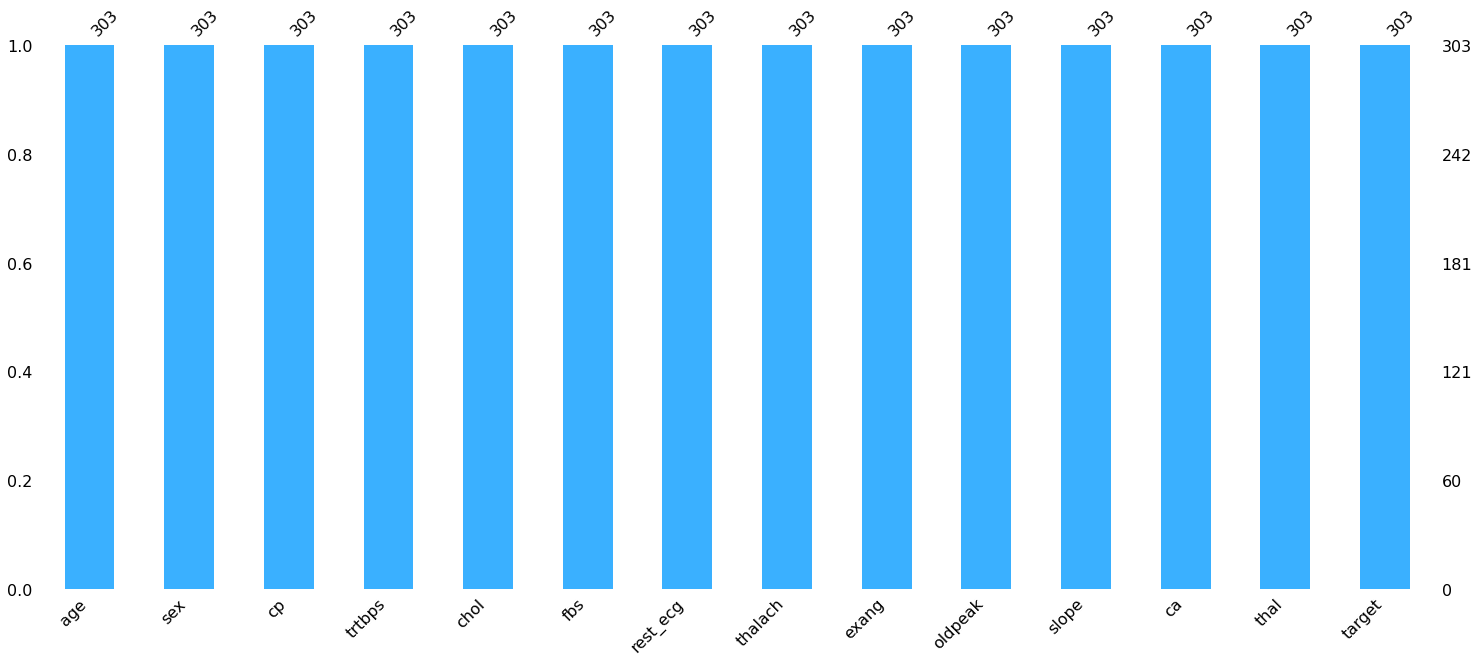

In [ ]:
import missingno #Visualización de valores perdidos
missingno.bar(df, color = "#3AB0FF")

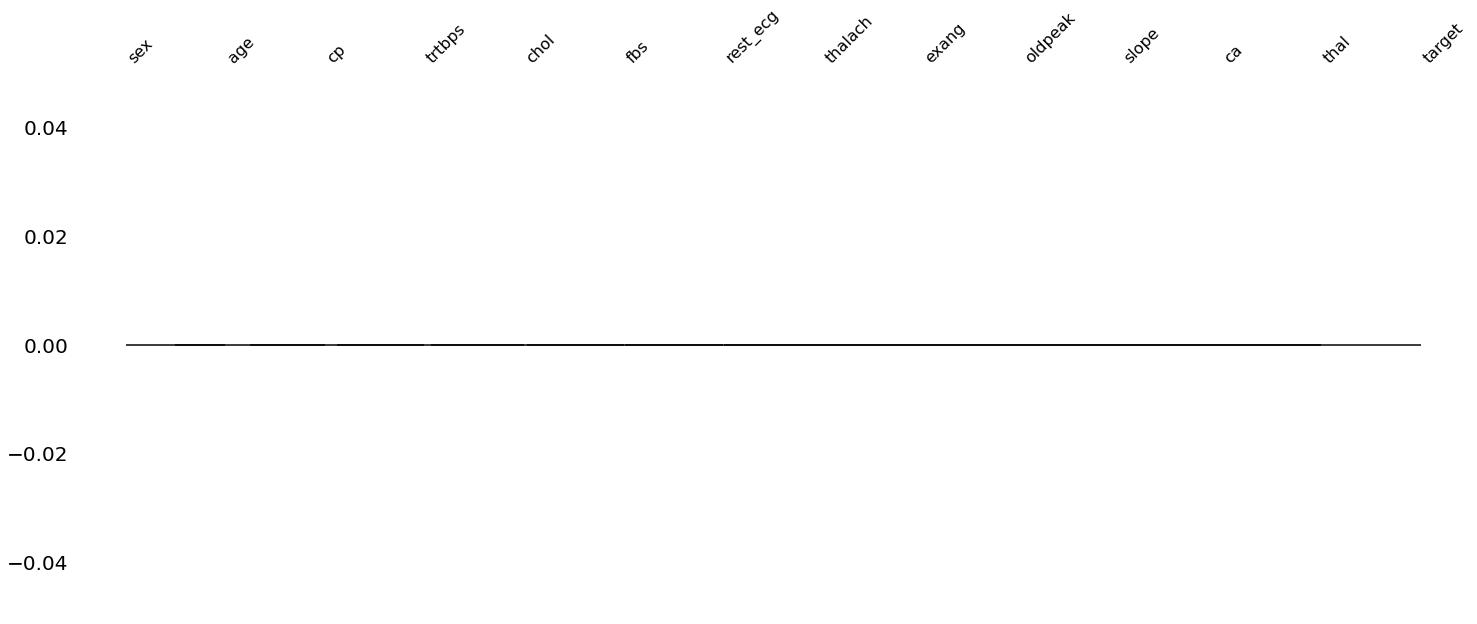

In [ ]:
#Clustering es la mejor forma de encontrar valores perdidos
missingno.dendrogram(df)

In [ ]:
#valores unicos en columna
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
#contamos las observaciones de la columna 'cp'
df["cp"].value_counts().sum()

303

In [ ]:
# creamos una lista con los encabezados de las columnas del dataset
names = df.columns.tolist()
names

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'rest_ecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
for i in names:
  df[i].value_counts()  
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


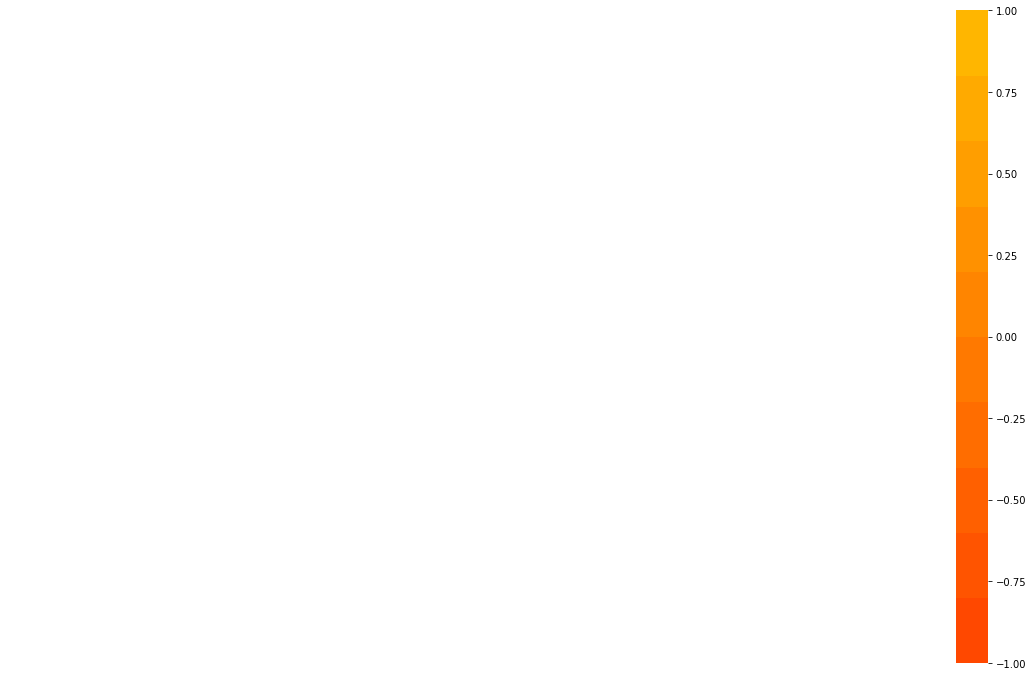

In [ ]:
colors = ['#ff4800', '#ff5400', '#ff6000', '#ff6d00', '#ff7900', '#ff8500', '#ff9100', '#ff9e00', '#ffaa00', '#ffb600'] #gradiente color
missingno.heatmap(df, cmap = colors)

In [ ]:
unique_number = []  #Valores únicos
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,index = df.columns,columns=["Total de valores únicos"])

,Total de valores únicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


> Separación de valores númericos y Categóricos

In [ ]:
numerical = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categorical = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

df[numerical].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


> Examinación estadística de variables

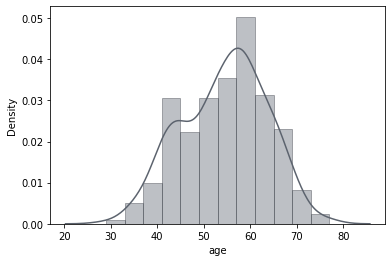

In [ ]:
sns.distplot(df["age"], hist_kws=dict(linewidth = 1, edgecolor = '#393E46'), color = '#5C636E')

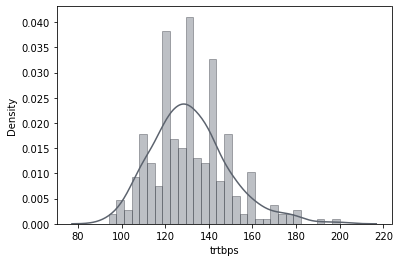

In [ ]:
sns.distplot(df["trtbps"], hist_kws= dict(linewidth=1, edgecolor= '#393E46'), bins = 30, color = '#5C636E')

En el _Machine Learning_ las distribuciones normales trabajan mejor

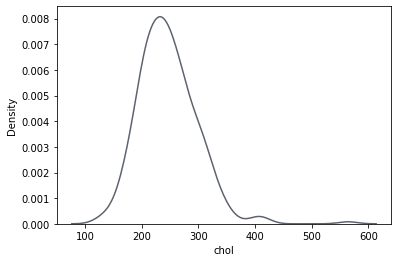

In [ ]:
sns.distplot(df["chol"], hist = False, color = '#5C636E')

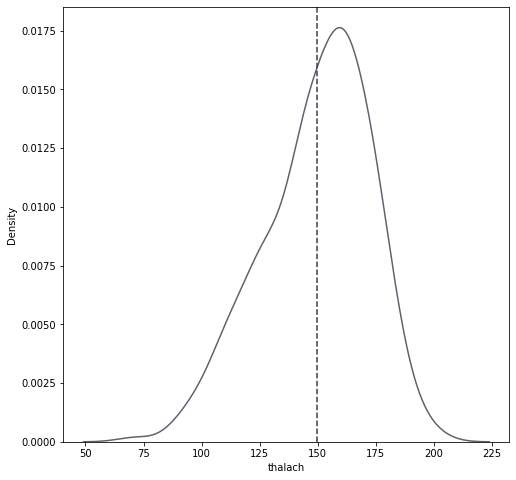

In [ ]:
x,y = plt.subplots(figsize = (8,8))
sns.distplot(df['thalach'],hist = False, ax = y, color = '#5C636E')
y.axvline(df['thalach'].mean(),color = "#393E46", ls = "--");

###Analisis de variables

In [ ]:
numerical_axis = ["Age of Paitent", "Restoring Blood Pressure", "Cholesterol", "Maximum Heart Rate Achived", "ST Depression"]
list(zip(numerical, numerical_axis))

[('age', 'Age of Paitent'),
 ('trtbps', 'Restoring Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achived'),
 ('oldpeak', 'ST Depression')]

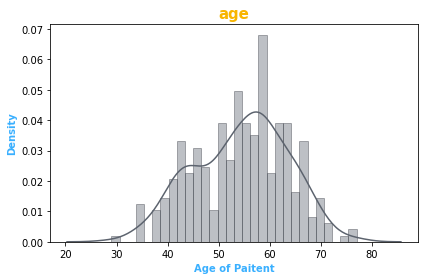

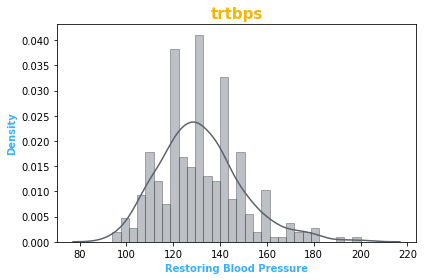

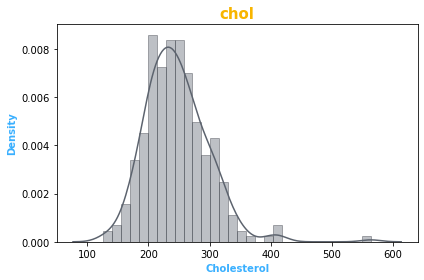

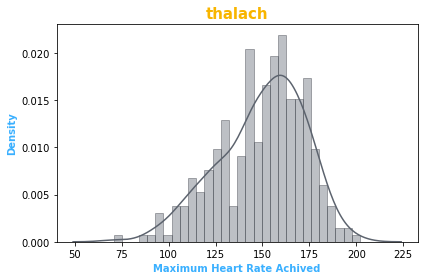

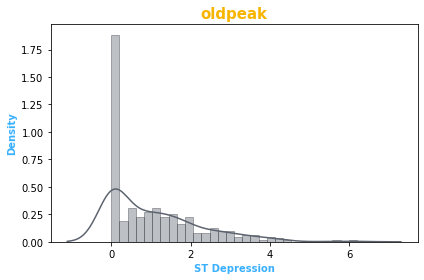

In [ ]:
title_font = {"family": "arial", "color":"#F8B500","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"#3AB0FF","weight":"bold","size":10}

for i,z in list(zip(numerical,numerical_axis)):
    sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor = '#393E46'), bins = 30, color = '#5C636E')
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict= axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [ ]:
categorical

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
categorical_axis_name = ["Gender","Chest Pain Type","Fasting Blood Sugar", "Resting Electrocardiographic Results",
                        "Excerise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels","Thal","Target"]
list(zip(categorical, categorical_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Excerise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

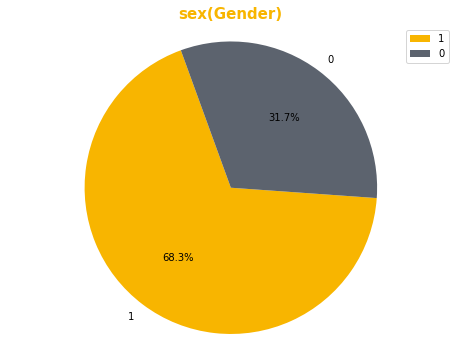

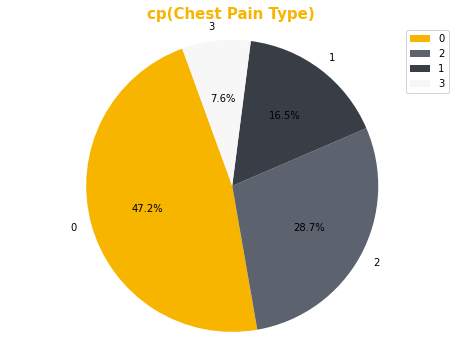

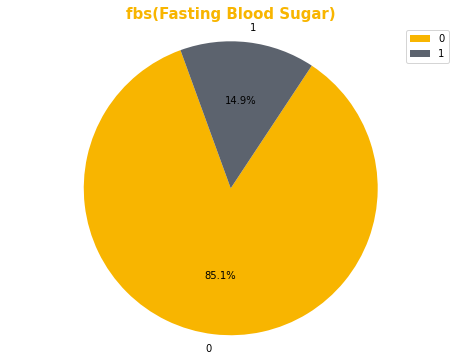

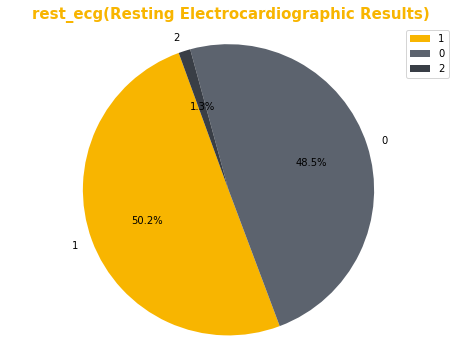

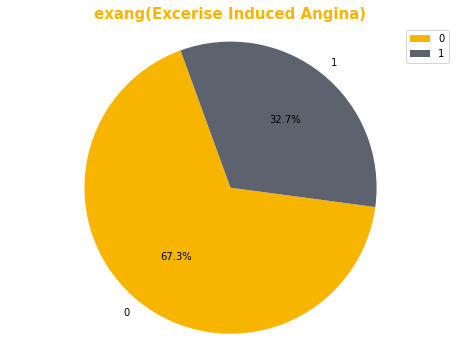

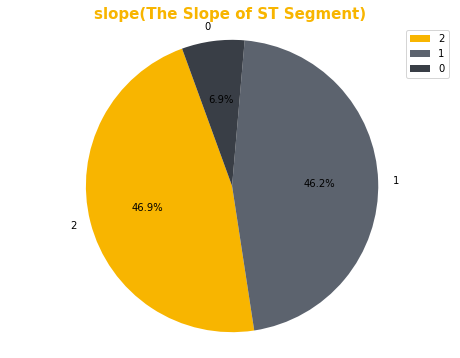

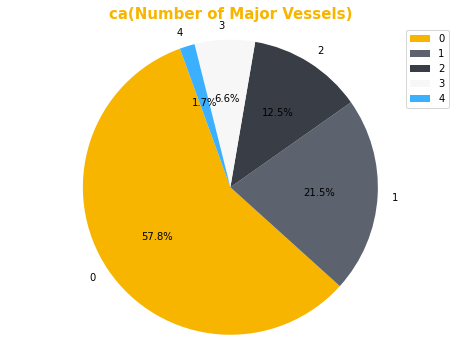

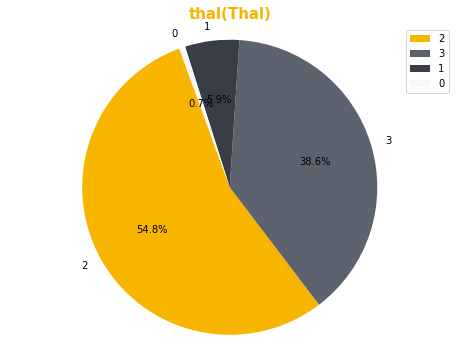

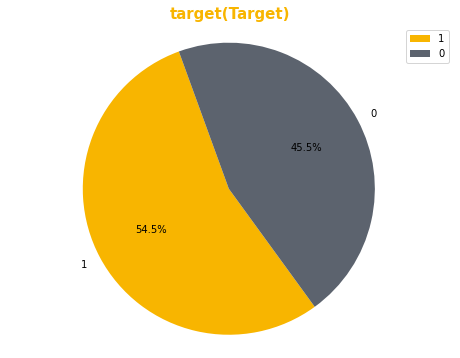

In [ ]:
title_font = {"family": "arial", "color":"#F8B500","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"#3AB0FF","weight":"bold","size":10}
for i,z in list(zip(categorical,categorical_axis_name)):
    fig,axis = plt.subplots(figsize=(8,6))
    
    observational_values = list(df[i].value_counts().index)
    toatl_observation_values = list(df[i].value_counts())
    
    colors = ['#F8B500', '#5C636E', '#393E46', '#F7F7F7', '#3AB0FF']
    axis.pie(toatl_observation_values,labels= observational_values, autopct = "%1.1f%%",startangle = 110 , labeldistance = 1.1, colors = colors)
    axis.axis("equal")
    
    plt.title((i+ "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()


In [ ]:
df[df['sex']==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [ ]:
df[df['thal']==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
df['thal']=df['thal'].replace(0,np.nan)
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [ ]:
isnull_number = []
for i in df.columns:
  x = df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df["thal"].fillna(2, inplace = True)
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


In [ ]:
df['thal'] = pd.to_numeric(df['thal'], downcast = 'integer')
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [ ]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total de Valores Perdidos"])

,Total de Valores Perdidos
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
numerical

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
numerical.append("target") # Analizamos el target con todas las variables numericas
numerical 

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

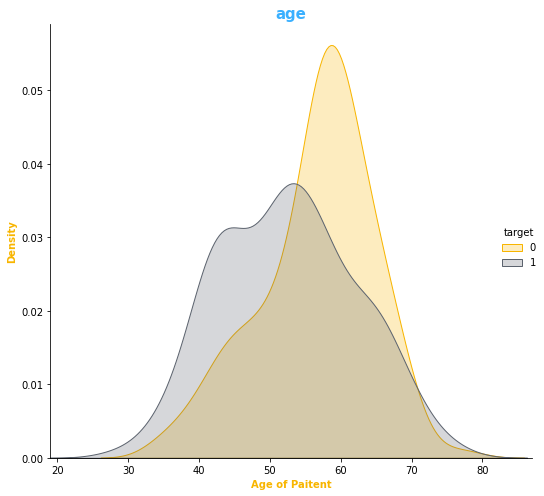

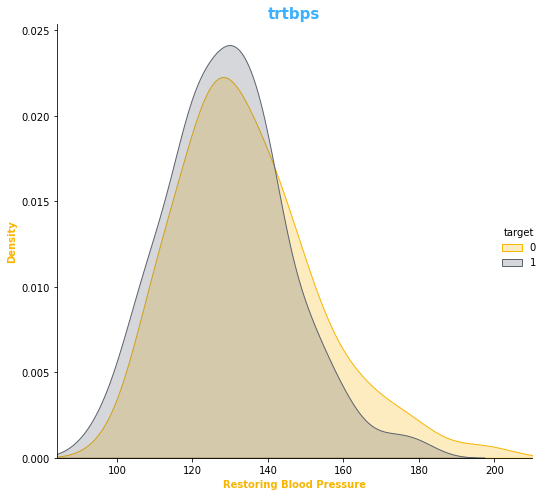

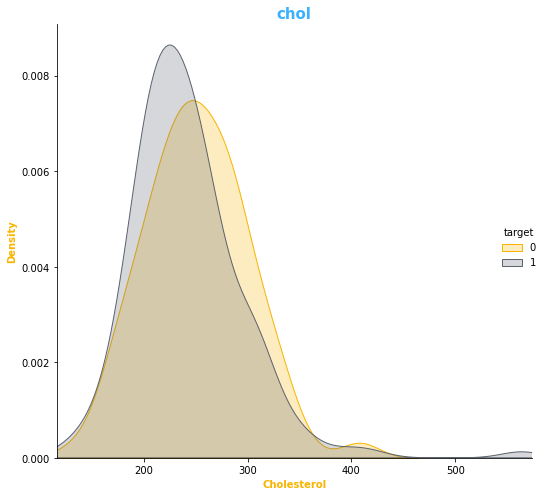

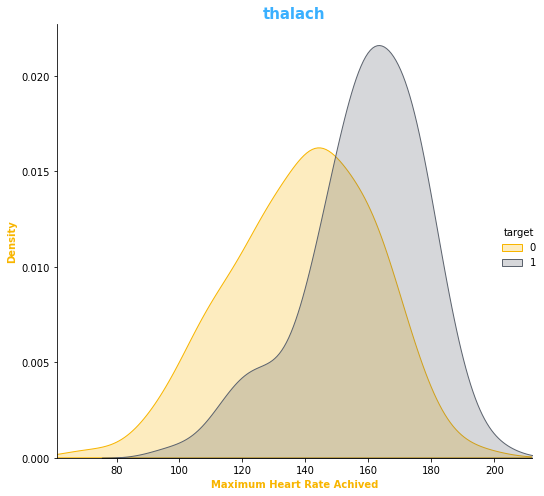

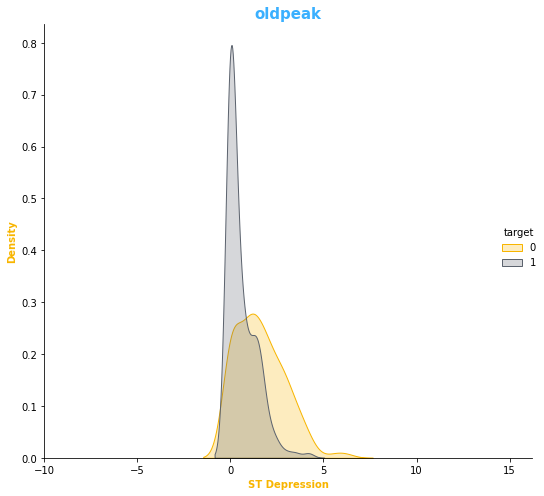

In [ ]:
#Libreria Seaborn
title_font = {"family": "arial", "color":"#3AB0FF","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"#F8B500","weight":"bold","size":10}
colors = ['#F8B500', '#5C636E', '#393E46', '#F7F7F7', '#3AB0FF']

for i,z in list(zip(numerical,numerical_axis)):
    graph = sns.FacetGrid(df[numerical], hue = "target", height =7,palette = colors ,xlim = (df[i].min()-10, (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict= axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [ ]:
#.corr() --> usado para encontrar la correlación de todas las columnas en el dataframe
df[numerical].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [ ]:
df[numerical].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


##Variables Categóricas

In [ ]:
categorical

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

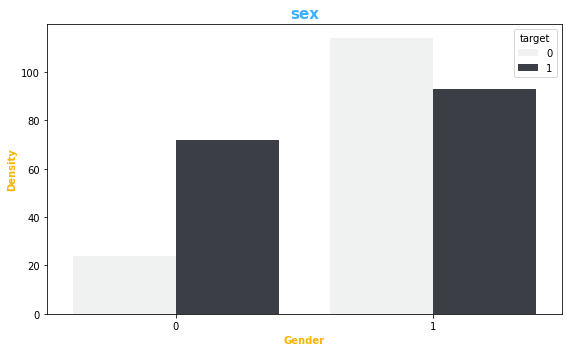

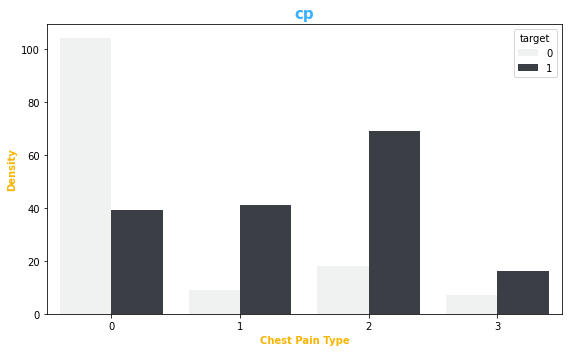

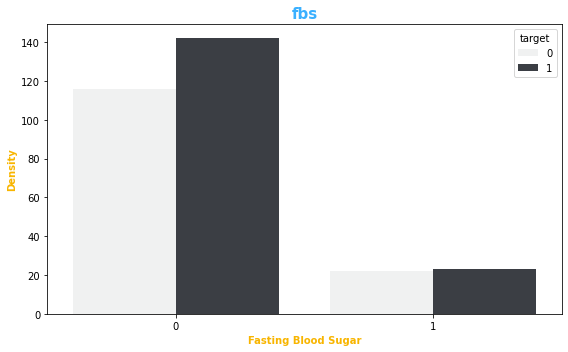

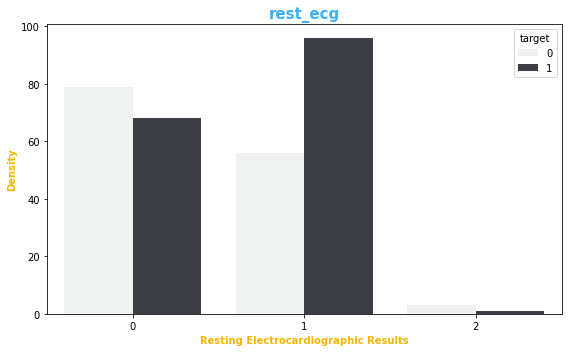

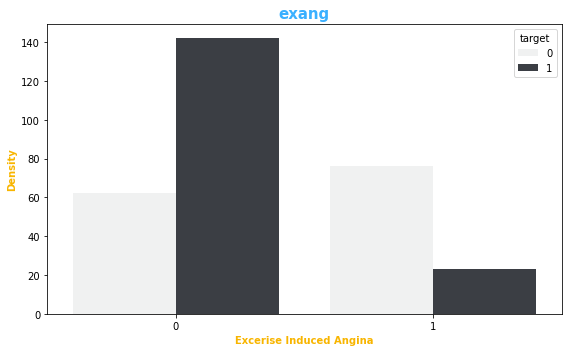

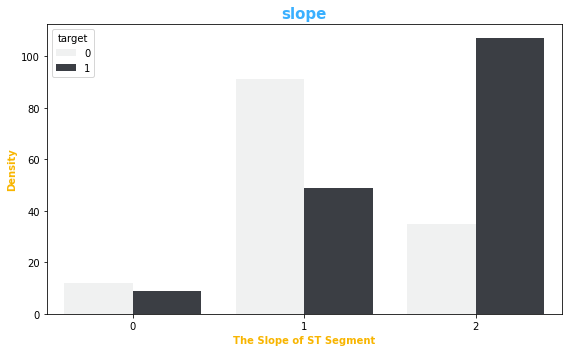

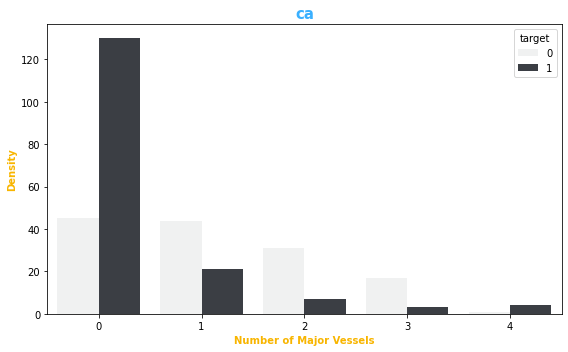

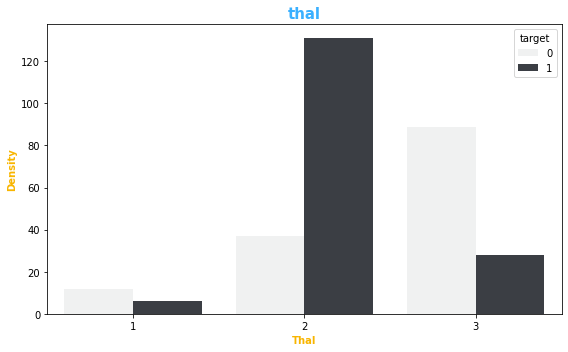

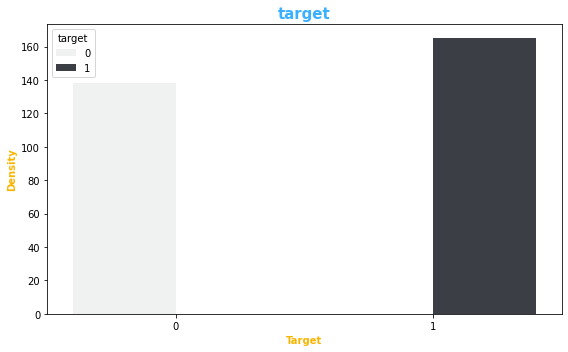

In [ ]:
from seaborn.distributions import to_rgba
title_font = {"family": "arial", "color":"#3AB0FF","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"#F8B500","weight":"bold","size":10}
colors =  ['#F8B500', '#5C636E', '#393E46', '#F7F7F7', '#3AB0FF']

for i,z in list(zip(categorical,categorical_axis_name)):
    plt.figure(figsize = (8,5))
    sns.countplot(i,data = df[categorical], hue = "target", color ='#393E46')
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict= axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

##Separación de datos en Test & Training Set



In [ ]:
dataframe_duplicate = df.copy()

In [ ]:
new_numerical = ['age', 'thalach', 'trtbps_winsorize', 'oldpeak', 'oldpeak_winsorize_sqrt']
dataframe_duplicate.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Dividimos el dataframe en datos de prueba y datos de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataframe_duplicate.drop(['target'], axis = 1)
Y = dataframe_duplicate[['target']]

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [ ]:
X_Test

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
X_Train.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2


In [ ]:
Y_Train.head()

,target
286,0
102,1
242,0
65,1
35,1


In [ ]:
print(f"X_Train:{X_Train.shape[0]}")
print(f"X_Test:{X_Test.shape[0]}")
print(f"Y_Train:{Y_Train.shape[0]}")
print(f"Y_Test:{Y_Test.shape[0]}")

X_Train:242
X_Test:61
Y_Train:242
Y_Test:61


##MODELADO
###Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_Train,Y_Train)
Y_Predicted = Logistic_Regression.predict(X_Test)
Y_Predicted

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
Accuracy = accuracy_score(Y_Test,Y_Predicted)
print("Precisión de la prueba:{}".format(Accuracy))

Precisión de la prueba:0.7704918032786885


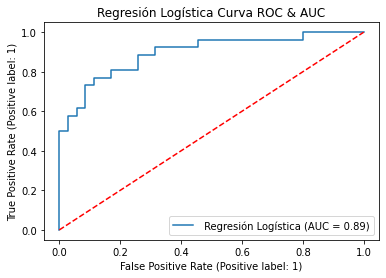

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Logistic_Regression,X_Test,Y_Test, name =" Regresión Logística")
plt.title("Regresión Logística Curva ROC & AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

##Algoritmo de Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state = 10)
Decision_Tree.fit(X_Train,Y_Train)
Y_Prediction = Decision_Tree.predict(X_Test)
print("Precisión de prueba del arbol de decisión: ", accuracy_score(Y_Test,Y_Prediction))

Precisión de prueba del arbol de decisión:  0.7377049180327869


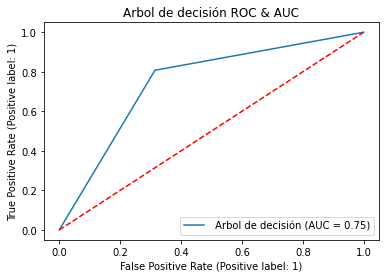

In [ ]:
plot_roc_curve(Decision_Tree,X_Test,Y_Test, name =" Arbol de decisión")
plt.title("Arbol de decisión ROC & AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

###SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVC_Model = SVC(random_state = 10)
SVC_Model.fit(X_Train,Y_Train)
Y_Prediction = SVC_Model.predict(X_Test)
print("Precisión de Support Vector Machine es: ", accuracy_score(Y_Test,Y_Prediction))

Precisión de Support Vector Machine es:  0.5901639344262295


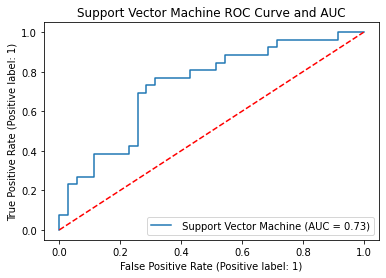

In [ ]:
plot_roc_curve(SVC_Model,X_Test,Y_Test, name =" Support Vector Machine")
plt.title("Support Vector Machine ROC Curve and AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(random_state = 10)
Random_Forest.fit(X_Train,Y_Train)
Y_Prediction = Random_Forest.predict(X_Test)
print("Precisión de Random Forest es: ", accuracy_score(Y_Test,Y_Prediction))

Precisión de Random Forest es:  0.8032786885245902


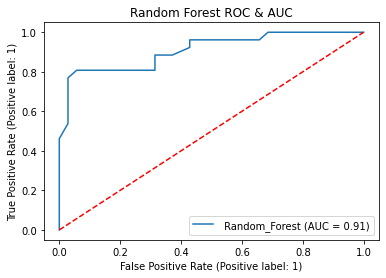

In [ ]:
plot_roc_curve(Random_Forest,X_Test,Y_Test, name ="Random_Forest")
plt.title("Random Forest ROC & AUC")
plt.plot([0,1],[0,1],"r--")
plt.show()

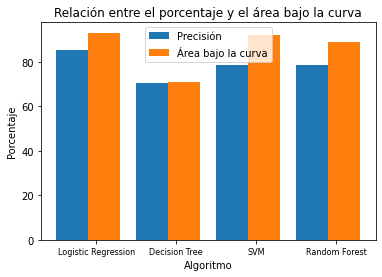

In [ ]:
algorithm =['Logistic Regression', 'Decision Tree', 'SVM','Random Forest']
accuracy = [85.24, 70.49, 78.68,78.68]
auc = [93,71,92,89]
X_axis = np.arange(len(algorithm))
  
plt.bar(X_axis - 0.1, accuracy, 0.8, label = 'Precisión')
plt.bar(X_axis + 0.1, auc, 0.4, label = 'Área bajo la curva')
  

plt.xticks(X_axis, algorithm,size = 8)
plt.xlabel("Algoritmo")
plt.ylabel("Porcentaje")
plt.title("Relación entre el porcentaje y el área bajo la curva")
plt.legend()
plt.show()